## Content
#### Top 10 Movies according to their Ratings and number of votes higher than 1000.
#### IMDB rating method using Average weighted rating formula.
#### Top 10 Movies according to their Average weighted Ratings.
#### Top 10 Movies according to their Popularity.
#### Top 10 Movies according to Equal weightage to rating and popularity.

# Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
movies=pd.read_csv('Top Rated Movie Database.csv')

# DataSet Inspection

In [3]:
movies.head()

,Popularity,Vote Count,Titile,Vote Average,Overview,Release Date
0,453.361,2875,Ad Astra,5.9,"The near future, a time when both hope and har...",2019-09-17
1,315.622,2653,Bad Boys for Life,7.1,Marcus and Mike are forced to confront new thr...,2020-01-15
2,241.513,1419,Bloodshot,7.2,"After he and his wife are murdered, marine Ray...",2020-03-05
3,209.518,2717,Birds of Prey (and the Fantabulous Emancipatio...,7.1,"Harley Quinn joins forces with a singer, an as...",2020-02-05
4,188.203,3834,Star Wars: The Rise of Skywalker,6.5,The surviving Resistance faces the First Order...,2019-12-18


Renaming the columns name because they contains whitespace in between which cause an error to programe.

In [4]:
movies.rename(columns={'Vote Average':'Ratings','Titile':'Title','Vote Count':'Votes','Release Date':'Release_Date'},inplace=True)

In [5]:
movies.columns

Index(['Popularity', 'Votes', 'Title', 'Ratings', 'Overview', 'Release_Date'], dtype='object')

In [6]:
movies.describe()

,Popularity,Votes,Ratings
count,10000.000000,10000.000000,10000.000000
mean,13.439259,1015.165500,6.341660
std,10.970790,1996.812101,1.264592
min,5.258000,0.000000,0.000000
25%,9.194750,136.000000,5.800000
50%,11.158500,312.000000,6.500000
75%,14.276500,919.000000,7.100000
max,453.361000,25168.000000,10.000000


In [29]:
movies.isna().sum()

Popularity                  0
Votes                       0
Title                       0
Ratings                     0
Overview                    0
Release_Date                0
Average_weighted_ratings    0
Equal_importance            0
dtype: int64

__Taking care of Overview and Release data missing values.__

In [26]:
movies['Overview'].fillna(value='',inplace=True)

In [28]:
movies['Release_Date'].fillna(movies['Release_Date'].mode()[0],inplace=True)

__Movies with highest rating and having number of votes higher then the average votes given to all movies.__

In [61]:
rate=movies.sort_values('Ratings',ascending=False)
rate=rate[rate['Votes'] > rate['Votes'].mean()]     # mean is close to 1000
rate

,Popularity,Votes,Title,Ratings,Overview,Release_Date,Average_weighted_ratings,Equal_importance
656,23.546,2231,Dilwale Dulhania Le Jayenge,8.8,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,8.082789,0.464065
154,43.202,11795,The Godfather,8.7,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.529533,0.537828
64,54.549,15551,The Shawshank Redemption,8.7,Framed in the 1940s for the double murder of h...,1994-09-23,8.568408,0.555000
351,31.658,9385,Schindler's List,8.6,The true story of how businessman Oskar Schind...,1993-11-30,8.398582,0.509754
149,41.760,9029,Spirited Away,8.5,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20,8.300612,0.509660
...,...,...,...,...,...,...,...,...
2162,15.508,4230,Fantastic Four,4.4,Four young outsiders teleport to a dangerous u...,2015-08-05,4.746550,0.068031
917,19.797,3132,Batman & Robin,4.3,Along with crime-fighting partner Robin and ne...,1997-06-20,4.763166,0.074745
2119,13.330,2802,Death Note,4.2,A young man comes to possess a supernatural no...,2017-08-25,4.728940,0.063558
3584,12.081,1308,Jack and Jill,4.1,"Jack Sadelstein, a successful advertising exec...",2011-11-11,5.025050,0.096518


# Top 10 Movies according to their Ratings and number of votes higher than 1000.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


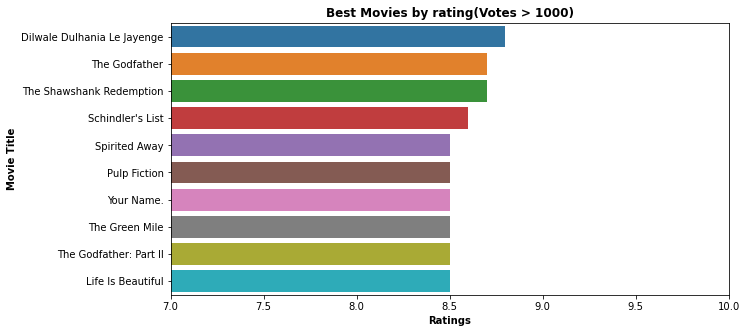

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(rate['Ratings'].head(10),rate['Title'].head(10));
plt.xlim(7, 10)
plt.title('Best Movies by rating(Votes > 1000)', weight='bold')
plt.xlabel('Ratings', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('Ratings.png')

## __IMDB rating method using Average weighted rating formula.__  
__Calculating the Average_weighted_ratings for each movie.__

In [8]:
R=movies['Ratings']          #Average rating of each movie.
v=movies['Votes']             # Number of times rating given to movie.
avgR=movies['Ratings'].mean()  # Average rating of all the movies.
minq=movies['Votes'].quantile(.75)   # Minimum number of votes required to be in top 25%.


In [9]:
avgR,minq

(6.3416599999999805, 919.0)

In [10]:
movies['Average_weighted_ratings']=((R*v)+(avgR*minq))/(v+minq)

__Arranging them in order of high to low rating.__

In [11]:
ratings=movies.sort_values('Average_weighted_ratings',ascending=False)

In [32]:
ratings.head(10)

,Popularity,Votes,Title,Ratings,Overview,Release_Date,Average_weighted_ratings
64,54.549,15551,The Shawshank Redemption,8.7,Framed in the 1940s for the double murder of h...,1994-09-23,8.568408
154,43.202,11795,The Godfather,8.7,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.529533
351,31.658,9385,Schindler's List,8.6,The true story of how businessman Oskar Schind...,1993-11-30,8.398582
152,38.827,18034,Pulp Fiction,8.5,"A burger-loving hit man, his philosophical par...",1994-09-10,8.395346
82,44.252,21588,The Dark Knight,8.4,Batman raises the stakes in his war on crime. ...,2008-07-16,8.315954
313,27.063,9757,The Green Mile,8.5,A supernatural tale set on death row in a Sout...,1999-12-10,8.314208
185,34.662,18691,Fight Club,8.4,A ticking-time-bomb insomniac and a slippery s...,1999-10-15,8.303538
149,41.760,9029,Spirited Away,8.5,"A young girl, Chihiro, becomes trapped in a st...",2001-07-20,8.300612
177,34.235,17372,Forrest Gump,8.4,A man with a low IQ has accomplished great thi...,1994-07-06,8.296582
493,26.063,8497,Life Is Beautiful,8.5,A touching story of an Italian book seller of ...,1997-12-20,8.289346


# Top 10 Movies according to their Average weighted Ratings.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


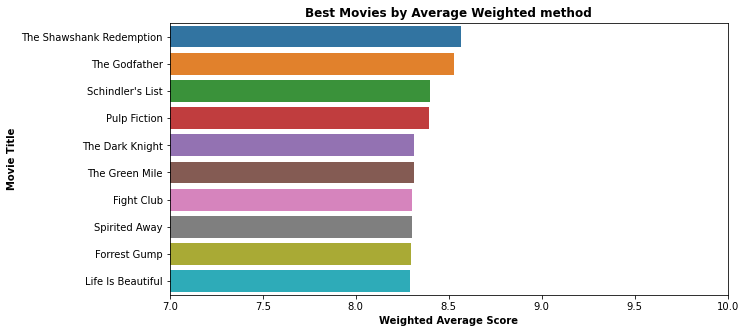

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(ratings['Average_weighted_ratings'].head(10),ratings['Title'].head(10));
plt.xlim(7, 10)
plt.title('Best Movies by Average Weighted method', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('Average weighted Ratings.png')

__Arranging them in order of high to low Popularity.__

In [39]:
popularity= movies.sort_values('Popularity',ascending=False)

In [41]:
popularity.head(10)

,Popularity,Votes,Title,Ratings,Overview,Release_Date,Average_weighted_ratings,Equal_importance
0,453.361,2875,Ad Astra,5.9,"The near future, a time when both hope and har...",2019-09-17,6.006981,0.702827
1,315.622,2653,Bad Boys for Life,7.1,Marcus and Mike are forced to confront new thr...,2020-01-15,6.904895,0.653311
2,241.513,1419,Bloodshot,7.2,"After he and his wife are murdered, marine Ray...",2020-03-05,6.862611,0.565713
3,209.518,2717,Birds of Prey (and the Fantabulous Emancipatio...,7.1,"Harley Quinn joins forces with a singer, an as...",2020-02-05,6.908329,0.535317
5,192.374,2130,Sonic the Hedgehog,7.4,Based on the global blockbuster videogame fran...,2020-02-12,7.081005,0.536221
4,188.203,3834,Star Wars: The Rise of Skywalker,6.5,The surviving Resistance faces the First Order...,2019-12-18,6.469385,0.460607
6,167.159,303,Teen Titans: The Judas Contract,7.2,Tara Markov is a girl who has power over earth...,2017-03-22,6.554489,0.447000
15,151.710,755,The Gentlemen,7.8,American expat Mickey Pearson has built a high...,2019-12-16,6.999394,0.481379
13,150.556,53,Trolls World Tour,8.0,Queen Poppy and Branch make a surprising disco...,2020-03-12,6.432084,0.414273
7,146.954,2028,The Platform,7.1,"A mysterious place, an indescribable prison, a...",2019-11-08,6.863517,0.460308


# Top 10 Movies according to their Popularity.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


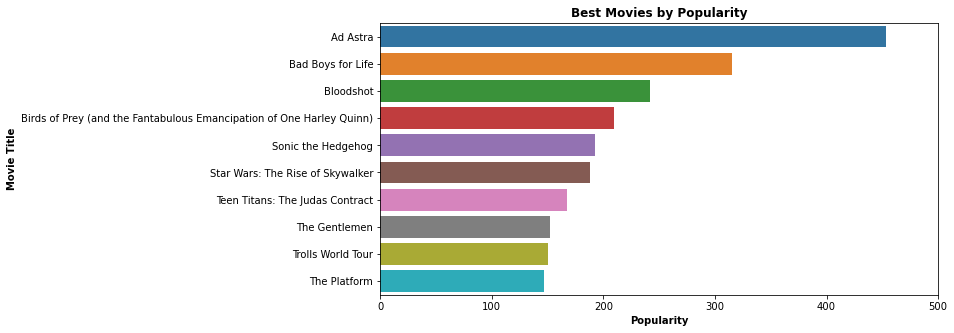

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(popularity['Popularity'].head(10),popularity['Title'].head(10));
plt.xlim(0, 500)
plt.title('Best Movies by Popularity', weight='bold')
plt.xlabel('Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('Popularity.png')

__Giving 50-50 % Importance to both 'Average_weighted_ratings' and 'Popularity' .__

In [49]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
normalized=pd.DataFrame(mms.fit_transform(movies.loc[:,['Popularity','Average_weighted_ratings']]))
normalized.head()

,0,1
0,1.000000,0.405654
1,0.692618,0.614004
2,0.527234,0.604192
3,0.455833,0.614800
4,0.408266,0.512949


In [50]:
movies['Equal_importance']=normalized[0]*0.5 + normalized[1]*0.5

__Arranging them in order of high to low thier popularity and ratings.__

In [19]:
Equal_importance=movies.sort_values('Equal_importance',ascending=False)

In [52]:
Equal_importance.head(10)

,Popularity,Votes,Title,Ratings,Overview,Release_Date,Average_weighted_ratings,Equal_importance
0,453.361,2875,Ad Astra,5.9,"The near future, a time when both hope and har...",2019-09-17,6.006981,0.702827
1,315.622,2653,Bad Boys for Life,7.1,Marcus and Mike are forced to confront new thr...,2020-01-15,6.904895,0.653311
2,241.513,1419,Bloodshot,7.2,"After he and his wife are murdered, marine Ray...",2020-03-05,6.862611,0.565713
20,100.558,6106,Parasite,8.5,"All unemployed, Ki-taek's family takes peculia...",2019-05-30,8.217649,0.565643
64,54.549,15551,The Shawshank Redemption,8.7,Framed in the 1940s for the double murder of h...,1994-09-23,8.568408,0.555000
44,83.528,17457,Avengers: Infinity War,8.3,As the Avengers and their allies have continue...,2018-04-25,8.202062,0.544832
24,95.498,10980,Joker,8.2,"During the 1980s, a failed stand-up comedian i...",2019-10-02,8.056474,0.541297
39,78.162,21624,Interstellar,8.3,Interstellar chronicles the adventures of a gr...,2014-11-05,8.220165,0.540945
154,43.202,11795,The Godfather,8.7,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,8.529533,0.537828
5,192.374,2130,Sonic the Hedgehog,7.4,Based on the global blockbuster videogame fran...,2020-02-12,7.081005,0.536221


# Top 10 Movies according to Equal weightage to rating and popularity.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


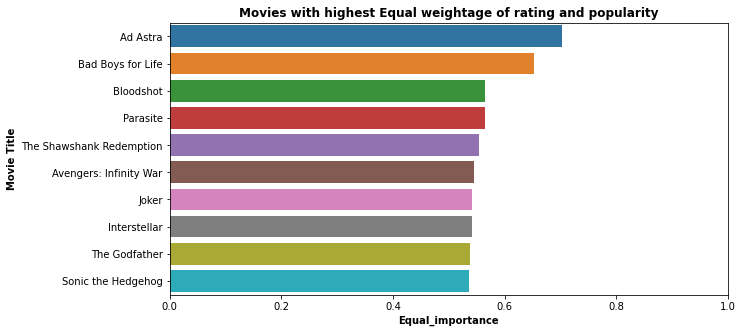

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(Equal_importance['Equal_importance'].head(10),Equal_importance['Title'].head(10));
plt.xlim(0, 1)
plt.title('Movies with highest Equal weightage of rating and popularity', weight='bold')
plt.xlabel('Equal_importance', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('Best Movies with Popularity and Rating.png')